In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

623

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4e462d0603aa631588b3bcd178ae4e81


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | srednekolymsk
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | saryozek
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | mazara del vallo
Processing Record 15 of Set 1 | luanda
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | tazovskiy
Processing Record 19 of Set 1 | marolambo
Processing Record 20 of Set 1 | agadez
Processing Record 21 of Set 1 | zlatoust
Processing Record 22 of Set 1 | qaanaaq
Processi

Processing Record 36 of Set 4 | torquay
Processing Record 37 of Set 4 | cockburn town
Processing Record 38 of Set 4 | sangar
Processing Record 39 of Set 4 | the pas
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | primorsk
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | laredo
Processing Record 47 of Set 4 | belaya gora
Processing Record 48 of Set 4 | anadyr
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | bonavista
Processing Record 1 of Set 5 | fort nelson
Processing Record 2 of Set 5 | ancud
Processing Record 3 of Set 5 | bay roberts
Processing Record 4 of Set 5 | ginir
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | rawson
Processing Record 7 of Set 5 | robinson
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of 

Processing Record 26 of Set 8 | vila velha
Processing Record 27 of Set 8 | yermakovskoye
Processing Record 28 of Set 8 | la orilla
Processing Record 29 of Set 8 | borskoye
Processing Record 30 of Set 8 | nyurba
Processing Record 31 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 32 of Set 8 | kangaatsiaq
Processing Record 33 of Set 8 | nishihara
Processing Record 34 of Set 8 | alangulam
Processing Record 35 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 36 of Set 8 | moron
Processing Record 37 of Set 8 | manacapuru
Processing Record 38 of Set 8 | dongsheng
Processing Record 39 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 41 of Set 8 | namatanai
Processing Record 42 of Set 8 | tungkang
City not found. Skipping...
Processing Record 43 of Set 8 | wonthaggi
Processing Record 44 of Set 8 | naftah
City not found. Skipping...
Processing Record 45 of Set 8 | maka

Processing Record 10 of Set 12 | kailua
Processing Record 11 of Set 12 | tezu
Processing Record 12 of Set 12 | tarasovskiy
Processing Record 13 of Set 12 | lima
Processing Record 14 of Set 12 | andenes
Processing Record 15 of Set 12 | sorong
Processing Record 16 of Set 12 | arrifes
Processing Record 17 of Set 12 | heihe
Processing Record 18 of Set 12 | sisimiut
Processing Record 19 of Set 12 | aracuai
Processing Record 20 of Set 12 | paradwip
City not found. Skipping...
Processing Record 21 of Set 12 | amazar
Processing Record 22 of Set 12 | ostrovnoy
Processing Record 23 of Set 12 | knysna
Processing Record 24 of Set 12 | goderich
Processing Record 25 of Set 12 | sambava
Processing Record 26 of Set 12 | nantucket
Processing Record 27 of Set 12 | phan rang
City not found. Skipping...
Processing Record 28 of Set 12 | pemangkat
Processing Record 29 of Set 12 | sibolga
Processing Record 30 of Set 12 | nizhneivkino
Processing Record 31 of Set 12 | borama
City not found. Skipping...
Process

In [10]:
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Srednekolymsk,67.4500,153.6833,28.13,66,100,17.54,RU,2021-09-19 13:47:42
1,Bluff,-46.6000,168.3333,43.81,85,15,12.55,NZ,2021-09-19 13:47:42
2,Saryozek,44.3583,77.9753,70.18,22,13,6.93,KZ,2021-09-19 13:47:43
3,Clyde River,70.4692,-68.5914,30.09,67,94,5.46,CA,2021-09-19 13:47:43
4,Port Alfred,-33.5906,26.8910,66.97,69,82,14.09,ZA,2021-09-19 13:47:43
5,Busselton,-33.6500,115.3333,51.08,75,2,15.37,AU,2021-09-19 13:47:44
6,Saldanha,-33.0117,17.9442,62.65,78,100,13.69,ZA,2021-09-19 13:47:44
7,Ushuaia,-54.8000,-68.3000,47.86,49,20,17.27,AR,2021-09-19 13:47:45
8,Albany,42.6001,-73.9662,65.14,76,66,5.08,US,2021-09-19 13:42:49
9,Tiksi,71.6872,128.8694,34.92,71,99,17.52,RU,2021-09-19 13:47:45


In [12]:
#reorder our columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Srednekolymsk,RU,2021-09-19 13:47:42,67.4500,153.6833,28.13,66,100,17.54
1,Bluff,NZ,2021-09-19 13:47:42,-46.6000,168.3333,43.81,85,15,12.55
2,Saryozek,KZ,2021-09-19 13:47:43,44.3583,77.9753,70.18,22,13,6.93
3,Clyde River,CA,2021-09-19 13:47:43,70.4692,-68.5914,30.09,67,94,5.46
4,Port Alfred,ZA,2021-09-19 13:47:43,-33.5906,26.8910,66.97,69,82,14.09
...,...,...,...,...,...,...,...,...,...
558,Nha Trang,VN,2021-09-19 13:49:54,12.2500,109.1833,77.00,86,99,2.95
559,Kralendijk,BQ,2021-09-19 13:51:08,12.1500,-68.2667,85.98,70,0,11.50
560,Karasjok,NO,2021-09-19 13:51:09,69.4719,25.5112,50.11,64,100,16.08
561,Sidi Ali,DZ,2021-09-19 13:51:09,36.0998,0.4206,80.26,51,0,13.71


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

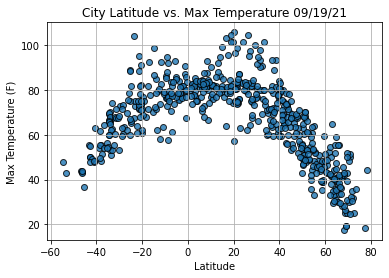

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

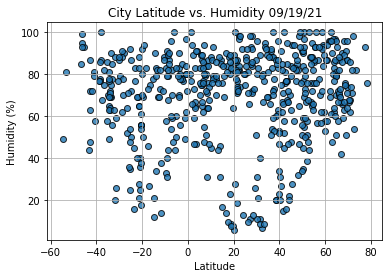

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

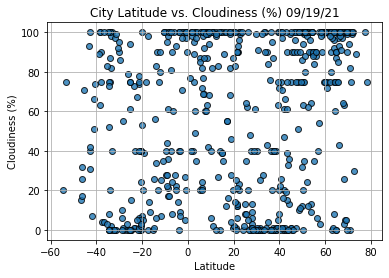

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

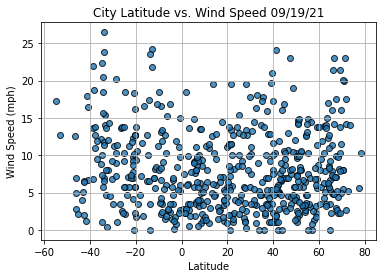

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Srednekolymsk,RU,2021-09-19 13:47:42,67.4500,153.6833,28.13,66,100,17.54
2,Saryozek,KZ,2021-09-19 13:47:43,44.3583,77.9753,70.18,22,13,6.93
3,Clyde River,CA,2021-09-19 13:47:43,70.4692,-68.5914,30.09,67,94,5.46
8,Albany,US,2021-09-19 13:42:49,42.6001,-73.9662,65.14,76,66,5.08
9,Tiksi,RU,2021-09-19 13:47:45,71.6872,128.8694,34.92,71,99,17.52


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

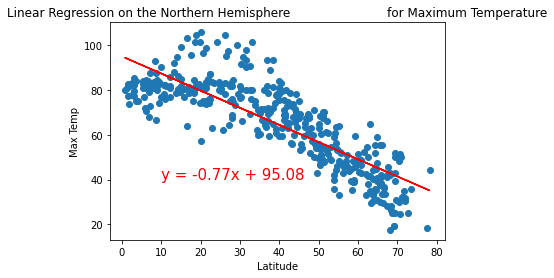

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

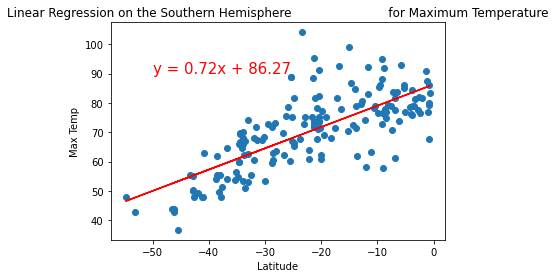

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

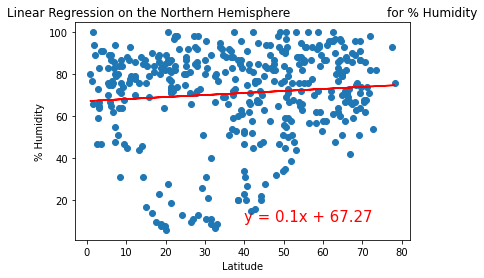

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

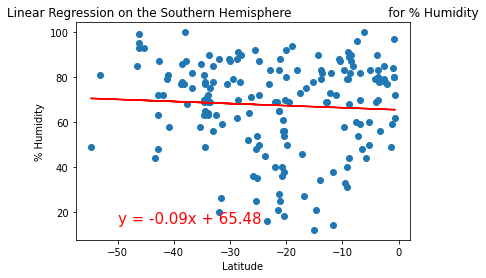

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

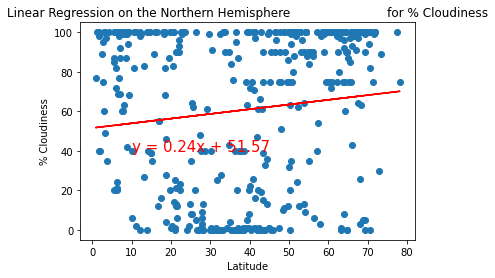

In [26]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

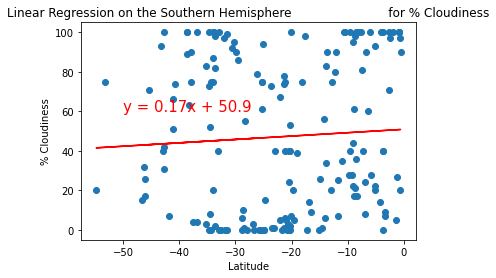

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

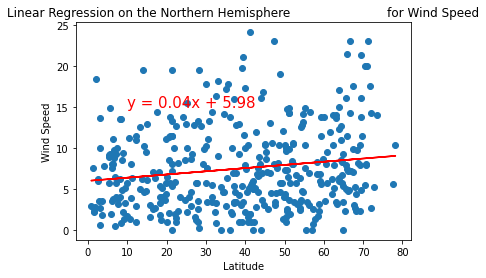

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,15))

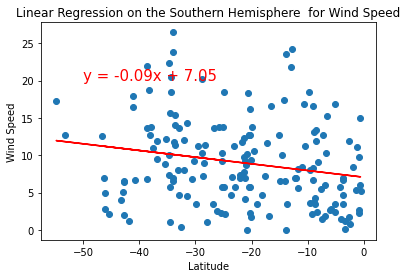

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere  for Wind Speed', 'Wind Speed',(-50,20))